# ARID1A Mutation Trans Effect on Proteomics

This notebook analyzes the trans effect of ARID1A mutation on interacting and other proteins, in Endometrial and Colon cancer

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import cptac
import cptac.utils as al

en = cptac.Endometrial()
co = cptac.Colon()

### Specify Gene

In [2]:
gene = "ARID1A"

### Investigate Proteomics, Phosphoproteomics, Acetylproteomics, or Transcriptomics

In [3]:
omics = "proteomics"
#omics = "transcriptomics"
#omics = "phosphoproteomics"
#omics = "acetylproteomics"

### Track all significant comparisons in dataframe

In [4]:
all_significant_comparisons = pd.DataFrame(columns=['Cancer_Type', 'Gene', 'Comparison','Interacting_Protein','P_Value'])

In [5]:
def add_to_all_significant_comparisons(df, cancer, interacting, all_sig_comp):
    expanded = df
    expanded['Gene'] = gene
    expanded['Cancer_Type'] = cancer
    expanded['Interacting_Protein'] = interacting
    
    updated_all_comparisons = pd.concat([all_sig_comp, expanded], sort=False)
    
    return updated_all_comparisons

# Interacting Proteins: Proteomics

### Generate interacting protein list

Make a call to the cptac.algorithms get interacting proteins bioplex method, which generates a list of known interacting partners with the given gene

In [6]:
'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins_bioplex(gene)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins:
    print(interacting_protein)

Interacting Proteins:
SMARCC2
SMARCE1
SS18
DPF2
DPF3
BCL7A
SMARCD1
BCL7C


## Endometrial

### Test for significant comparisons in any of interacting proteins

In [21]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")
        
        all_significant_comparisons = add_to_all_significant_comparisons(wrap_results, "Endometrial", True, all_significant_comparisons)


Doing t-test comparisons

SMARCC2_proteomics :  8.27047328548376e-05
SMARCE1_proteomics :  0.00014980267328352896
SS18_proteomics :  0.0821990066558892
DPF2_proteomics :  2.1666091867648467e-07
DPF3_proteomics :  nan
BCL7A_proteomics :  0.5592002438288151
SMARCD1_proteomics :  0.00017449149012151386
BCL7C_proteomics :  0.00043795374490157736
           Comparison       P_Value
0     DPF2_proteomics  2.166609e-07
1  SMARCC2_proteomics  8.270473e-05
2  SMARCE1_proteomics  1.498027e-04
3  SMARCD1_proteomics  1.744915e-04
4    BCL7C_proteomics  4.379537e-04





In [20]:
help(al.wrap_ttest)

Help on function wrap_ttest in module cptac.utils:

wrap_ttest(df, label_column, comparison_columns, alpha=0.05, verbose=False)



## Colon

### Test for significant comparisons in any of interacting proteins

In [8]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")
        
        all_significant_comparisons = add_to_all_significant_comparisons(wrap_results, "Colon", True, all_significant_comparisons)


Doing t-test comparisons

No significant comparisons.


# All Proteins: Proteomics

## Endometrial

In [9]:
try:
    print("\nGene: ", gene)

    '''Use all proteins'''

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")
            
            all_significant_comparisons = add_to_all_significant_comparisons(wrap_results, "Endometrial", False, all_significant_comparisons)


except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  ARID1A


Doing t-test comparisons

          Comparison       P_Value
0  ARID1A_proteomics  1.025018e-10
1   MAP1S_proteomics  1.010149e-07
2    DPF2_proteomics  2.166609e-07
3   KDM4B_proteomics  4.414547e-07
4    RRM1_proteomics  4.455870e-07
5  MAP7D3_proteomics  4.880890e-07
6   CYTH3_proteomics  3.109396e-06
7   CEP78_proteomics  3.749172e-06





## Colon

In [10]:
try:
    print("\nGene: ", gene)
    
    '''Use all proteins'''
    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the dataframe correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")
            
            all_significant_comparisons = add_to_all_significant_comparisons(wrap_results, "Colon", False, all_significant_comparisons)


except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  ARID1A


Doing t-test comparisons

No significant comparisons.


### Print all significant comparisons

In [11]:
if len(all_significant_comparisons) > 0:
    display(all_significant_comparisons)
    
else:
    print('No Significant Comparisons!')

,Cancer_Type,Gene,Comparison,Interacting_Protein,P_Value
0,Endometrial,ARID1A,DPF2_proteomics,True,2.166609e-07
1,Endometrial,ARID1A,SMARCC2_proteomics,True,8.270473e-05
2,Endometrial,ARID1A,SMARCE1_proteomics,True,1.498027e-04
3,Endometrial,ARID1A,SMARCD1_proteomics,True,1.744915e-04
4,Endometrial,ARID1A,BCL7C_proteomics,True,4.379537e-04
0,Endometrial,ARID1A,ARID1A_proteomics,False,1.025018e-10
1,Endometrial,ARID1A,MAP1S_proteomics,False,1.010149e-07
2,Endometrial,ARID1A,DPF2_proteomics,False,2.166609e-07
3,Endometrial,ARID1A,KDM4B_proteomics,False,4.414547e-07
4,Endometrial,ARID1A,RRM1_proteomics,False,4.455870e-07


These are all our results from the trans analysis. It shows which proteomic values are significantly altered when ARID1A is mutated.

### Example of visualization of one of these (Let's use DPF2)

#### First format the dataframe to plot

In [12]:
protdf = en.join_omics_to_mutations(omics_df_name='proteomics',omics_genes='DPF2',mutations_genes='ARID1A')
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

protdf.head()

Name,DPF2_proteomics,Label
Sample_ID,,
S001,-0.548,Mutated
S002,-0.919,Mutated
S003,-0.555,Wildtype
S005,0.372,Wildtype
S006,-0.642,Wildtype


Boxplot will show this:

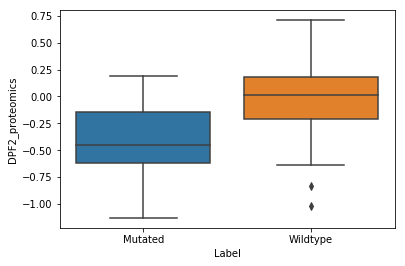

In [13]:
sns.boxplot(data=protdf, x='Label', y='DPF2_proteomics')

Stripplot will show this:

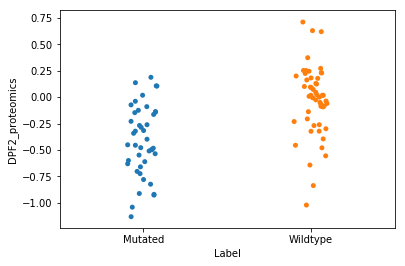

In [16]:
sns.stripplot(data=protdf, x='Label', y='DPF2_proteomics', jitter=True, dodge=True)

Together we get this:

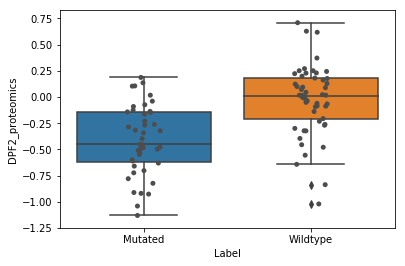

In [15]:
sns.boxplot(data=protdf, x='Label', y='DPF2_proteomics')
sns.stripplot(data=protdf, x='Label', y='DPF2_proteomics', jitter=True, dodge=True, color='.3')

You can play around with the plotting library depending on the figure you're trying to generate for the use case too.